In [41]:
import seaborn as sns;
import pandas as pd;

#1 Find and download a dataset
taxiData = sns.load_dataset("taxis")
#2 Data Exploration
taxiData.describe() 

,pickup,dropoff,passengers,distance,fare,tip,tolls,total
count,6433,6433,6433.000000,6433.000000,6433.000000,6433.00000,6433.000000,6433.000000
mean,2019-03-16 08:31:28.514223616,2019-03-16 08:45:49.491217408,1.539251,3.024617,13.091073,1.97922,0.325273,18.517794
min,2019-02-28 23:29:03,2019-02-28 23:32:35,0.000000,0.000000,1.000000,0.00000,0.000000,1.300000
25%,2019-03-08 15:50:34,2019-03-08 16:12:51,1.000000,0.980000,6.500000,0.00000,0.000000,10.800000
50%,2019-03-15 21:46:58,2019-03-15 22:06:44,1.000000,1.640000,9.500000,1.70000,0.000000,14.160000
75%,2019-03-23 17:41:38,2019-03-23 17:51:56,2.000000,3.210000,15.000000,2.80000,0.000000,20.300000
max,2019-03-31 23:43:45,2019-04-01 00:13:58,6.000000,36.700000,150.000000,33.20000,24.020000,174.820000
std,NaN,NaN,1.203768,3.827867,11.551804,2.44856,1.415267,13.815570


In [42]:
#2 Data Exploration
taxiData.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan


In [43]:
#2 Data Exploration
taxiData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6433 entries, 0 to 6432
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   pickup           6433 non-null   datetime64[ns]
 1   dropoff          6433 non-null   datetime64[ns]
 2   passengers       6433 non-null   int64         
 3   distance         6433 non-null   float64       
 4   fare             6433 non-null   float64       
 5   tip              6433 non-null   float64       
 6   tolls            6433 non-null   float64       
 7   total            6433 non-null   float64       
 8   color            6433 non-null   object        
 9   payment          6389 non-null   object        
 10  pickup_zone      6407 non-null   object        
 11  dropoff_zone     6388 non-null   object        
 12  pickup_borough   6407 non-null   object        
 13  dropoff_borough  6388 non-null   object        
dtypes: datetime64[ns](2), float64(5), int64(

In [44]:
#3 Data cleaning
print("Uncleaned dataset:",taxiData["total"].count())
tripData = taxiData.drop(taxiData[ (taxiData['passengers'] == 0)].index)
print("Minimum of 1 passengers:",tripData["total"].count())
tripData = tripData.drop(tripData[ (tripData['distance'] == 0)].index)
tripData ["payment"] = tripData["payment"].fillna("credit card")
tripData = tripData.dropna()
print("Minimum 1 passenger and distance:",tripData["total"].count())
print("Cleaned total:", taxiData["total"].count() - tripData["total"].count())

Uncleaned dataset: 6433
Minimum of 1 passengers: 6337
Minimum 1 passenger and distance: 6252
Cleaned total: 181


In [45]:
tripData.sort_values('distance', ascending=False).head(5)

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
5364,2019-03-17 16:59:17,2019-03-17 18:04:08,2,36.70,150.0,0.00,24.02,174.82,yellow,cash,JFK Airport,JFK Airport,Queens,Queens
2397,2019-03-21 18:56:59,2019-03-21 19:49:58,1,30.23,52.0,13.11,5.76,78.67,yellow,credit card,JFK Airport,Meatpacking/West Village West,Queens,Manhattan
1535,2019-03-09 18:57:53,2019-03-09 19:49:53,1,28.30,52.0,2.00,5.76,63.06,yellow,credit card,World Trade Center,JFK Airport,Manhattan,Queens
3875,2019-03-30 17:07:48,2019-03-30 18:10:46,6,28.15,52.0,12.46,9.50,74.76,yellow,credit card,Financial District North,JFK Airport,Manhattan,Queens
4218,2019-03-29 17:32:20,2019-03-29 18:53:52,1,26.92,75.5,23.19,0.00,100.49,yellow,credit card,JFK Airport,Cobble Hill,Queens,Brooklyn


In [50]:
tripData.sort_values('fare', ascending=False).head(5)

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
5364,2024-02-19 16:59:00,2019-03-17 18:04:08,2,36.70,150.00,0.00,24.02,174.82,yellow,cash,JFK Airport,JFK Airport,Queens,Queens
5567,2024-02-19 00:28:00,2019-03-07 02:02:55,1,25.51,93.50,0.00,0.00,94.80,green,credit card,Sunset Park West,Saint Albans,Brooklyn,Queens
5827,2024-02-19 10:34:00,2019-03-05 11:44:01,1,20.64,86.14,0.00,5.76,92.40,green,credit card,Coney Island,Upper East Side North,Brooklyn,Manhattan
6053,2024-02-19 07:23:00,2019-03-05 09:11:29,1,22.17,81.86,0.00,0.00,82.36,green,credit card,University Heights/Morris Heights,Yorkville East,Bronx,Manhattan
4218,2024-02-19 17:32:00,2019-03-29 18:53:52,1,26.92,75.50,23.19,0.00,100.49,yellow,credit card,JFK Airport,Cobble Hill,Queens,Brooklyn


In [52]:
tripData.sort_values('tip', ascending=False).head(5)

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
4218,2024-02-19 17:32:00,2019-03-29 18:53:52,1,26.92,75.50,23.19,0.00,100.49,yellow,credit card,JFK Airport,Cobble Hill,Queens,Brooklyn
2387,2024-02-19 15:58:00,2019-03-28 15:59:25,1,1.80,69.06,20.80,0.00,90.16,yellow,credit card,JFK Airport,JFK Airport,Queens,Queens
785,2024-02-19 15:10:00,2019-03-15 16:25:25,1,16.30,52.00,18.30,5.76,79.36,yellow,credit card,Murray Hill,JFK Airport,Manhattan,Queens
4267,2024-02-19 18:08:00,2019-03-27 19:01:45,1,16.77,52.00,16.39,5.76,81.95,yellow,credit card,JFK Airport,East Village,Queens,Manhattan
2122,2024-02-19 00:40:00,2019-03-08 01:11:53,1,15.51,44.00,16.27,17.28,81.35,yellow,credit card,TriBeCa/Civic Center,West Brighton,Manhattan,Staten Island


<Axes: xlabel='dropoff_zone', ylabel='count'>

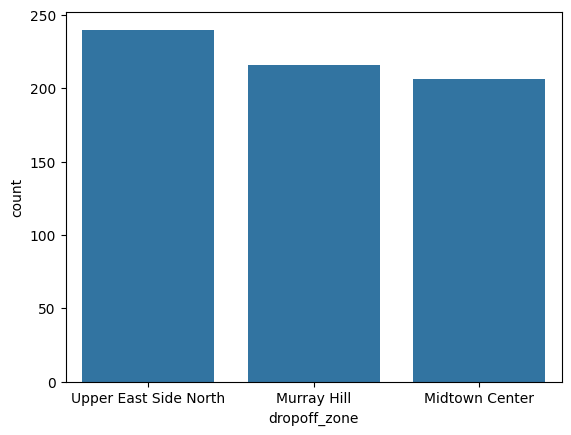

In [47]:
#4 Data Visualization
sns.countplot(data=tripData, x="dropoff_zone", order=tripData['dropoff_zone'].value_counts().iloc[:3].index)

<Axes: xlabel='pickup_zone', ylabel='count'>

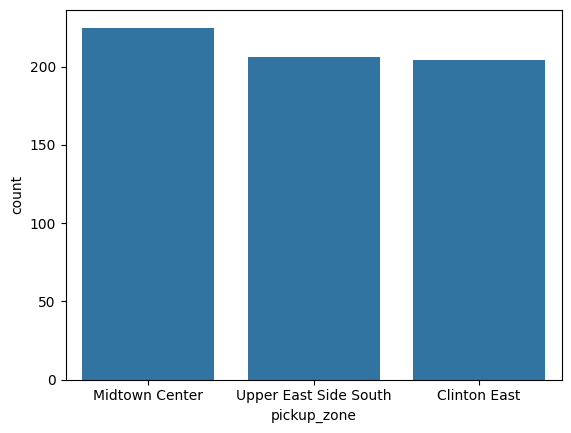

In [48]:
sns.countplot(data=tripData, x="pickup_zone", order=tripData['pickup_zone'].value_counts().iloc[:3].index)

C:\Users\Mads T.F. Knudsen\AppData\Local\Temp\ipykernel_18412\2527270436.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  timeData['pickup'] = pd.to_datetime(timeData['pickup'].dt.strftime('%H:%M'))


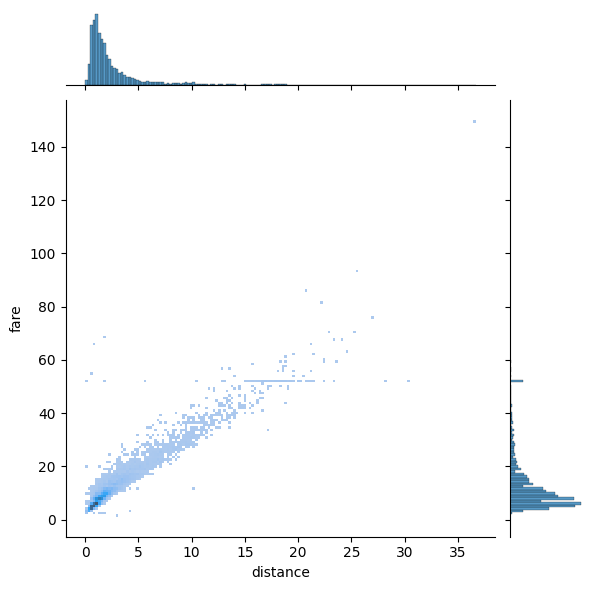

In [53]:
timeData = tripData
timeData['pickup'] = pd.to_datetime(timeData['pickup'].dt.strftime('%H:%M'))
sns.jointplot(data=timeData,x="distance", y="fare", kind="hist")